In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Load the Olivetti Faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X, y = data.data, data.target

In [3]:
# Split the dataset 5 images per subject for training, last 5 would be for testing
train_indices = np.array([i * 10 + j for i in range(40) for j in range(5)])
test_indices = np.array([i * 10 + j for i in range(40) for j in range(5, 10)])

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

In [4]:
# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
y_pred_lda = lda.predict(X_test)

In [5]:
#Evalutate LDA report
print("LDA Classification Report:")
print(classification_report(y_test, y_pred_lda))

LDA Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4
           4       0.67      0.50      0.57         4
           5       1.00      1.00      1.00         4
           6       1.00      0.80      0.89         5
           7       1.00      1.00      1.00         4
           8       0.88      1.00      0.93         7
           9       1.00      0.83      0.91         6
          10       1.00      0.86      0.92         7
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       0.86      1.00      0.92         6


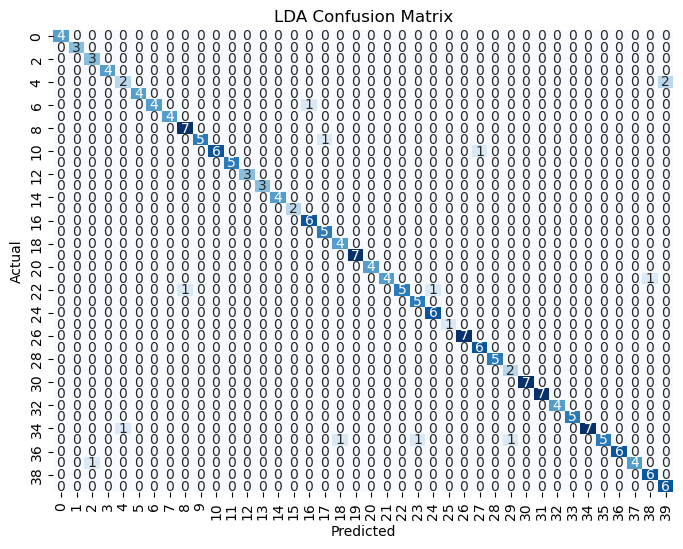

In [6]:
#Confusion Matrix for LDA
lda_cm = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(lda_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("LDA Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

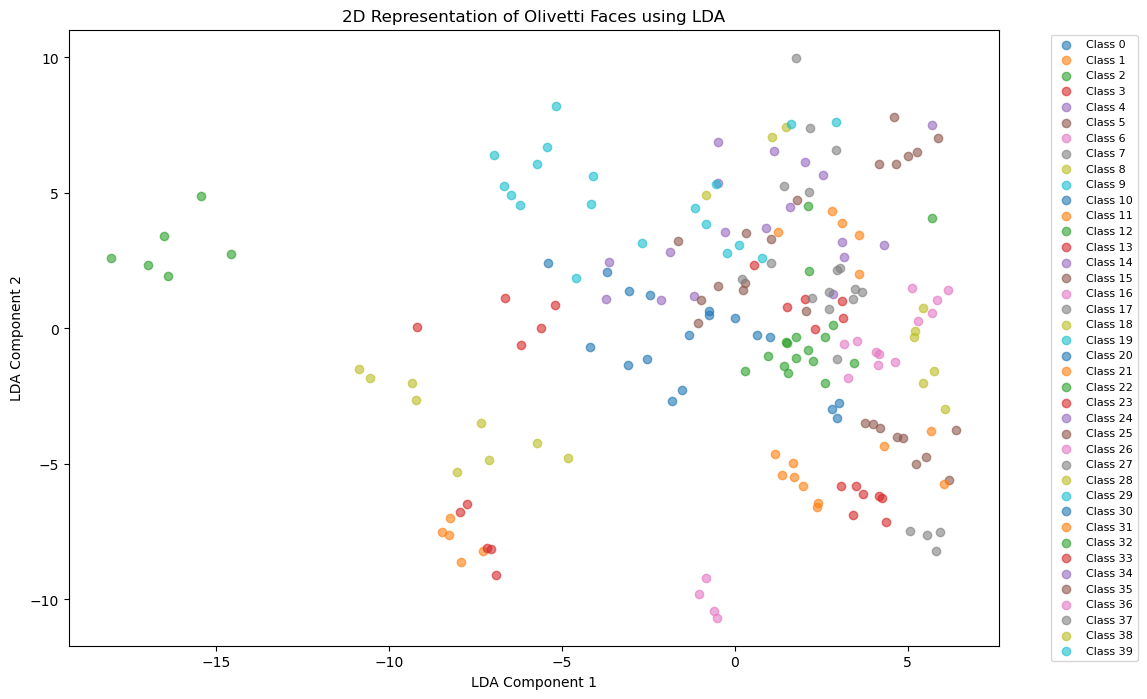

In [7]:
# Visualize 2D rep of datasets for LDA
plt.figure(figsize=(12, 8))
for i in range(40):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], label=f"Class {i}", alpha=0.6)
plt.title("2D Representation of Olivetti Faces using LDA")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

In [8]:
#Testing for SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [9]:
#Evalutating SVM performance report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         4
           6       0.67      0.80      0.73         5
           7       0.80      1.00      0.89         4
           8       0.86      0.86      0.86         7
           9       1.00      0.67      0.80         6
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         5
          12       0.75      1.00      0.86         3
          13       1.00      1.00      1.00         3
          14       0.67      1.00      0.80         4
          15       1.00      1.00      1.00         2
          16       0.86      1.00      0.92         6


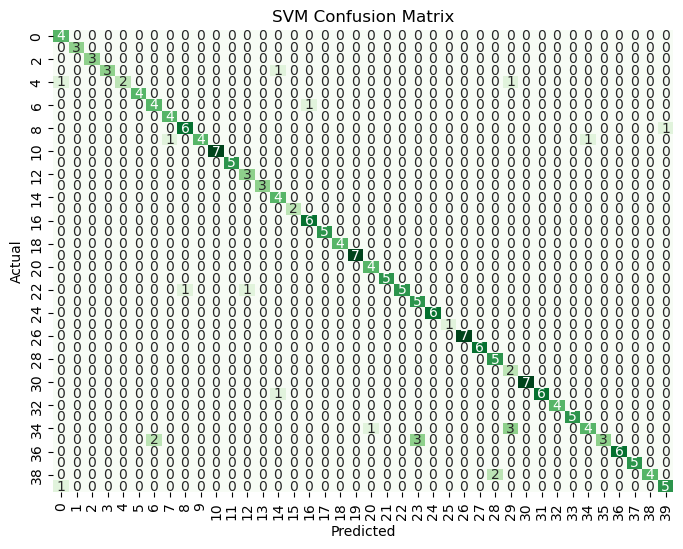

In [10]:
# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
"""Visualize the individuals with the highest confusion between two classes.

    Parameters:
    - conf_matrix: Confusion matrix.
    - predictions: Predicted labels.
    - X_test: Test images.
    - y_test: True labels for test images.
    - max_images: Maximum number of images to display per class."""

def visualize_highest_confusion(conf_matrix, predictions, X_test, y_test, max_images=5):

    # Find the most confused pair of classes
    conf_matrix[np.diag_indices_from(conf_matrix)] = 0  # Ignore diagonal elements
    most_confused = np.unravel_index(np.argmax(conf_matrix), conf_matrix.shape)
    class_1, class_2 = most_confused

    print(f"Highest confusion between classes {class_1} and {class_2}")

    # Get the images for the most confused classes
    class_1_images = X_test[y_test == class_1]
    class_2_images = X_test[y_test == class_2]

    # Plot images from both classes
    fig, axes = plt.subplots(2, max_images, figsize=(12, 6))
    for i, ax in enumerate(axes[0]):
        if i < len(class_1_images):
            ax.imshow(class_1_images[i].reshape(64, 64), cmap='gray')
            ax.axis('off')
            ax.set_title(f"True: {class_1}")
        else:
            ax.axis('off')  # Leave blank if there aren't enough images

    for i, ax in enumerate(axes[1]):
        if i < len(class_2_images):
            ax.imshow(class_2_images[i].reshape(64, 64), cmap='gray')
            ax.axis('off')
            ax.set_title(f"True: {class_2}")
        else:
            ax.axis('off')  # Leave blank if there aren't enough images

    plt.suptitle(f"Most Confused Classes: {class_1} vs {class_2}")
    plt.tight_layout()
    plt.show()

Highest confusion between classes 4 and 39


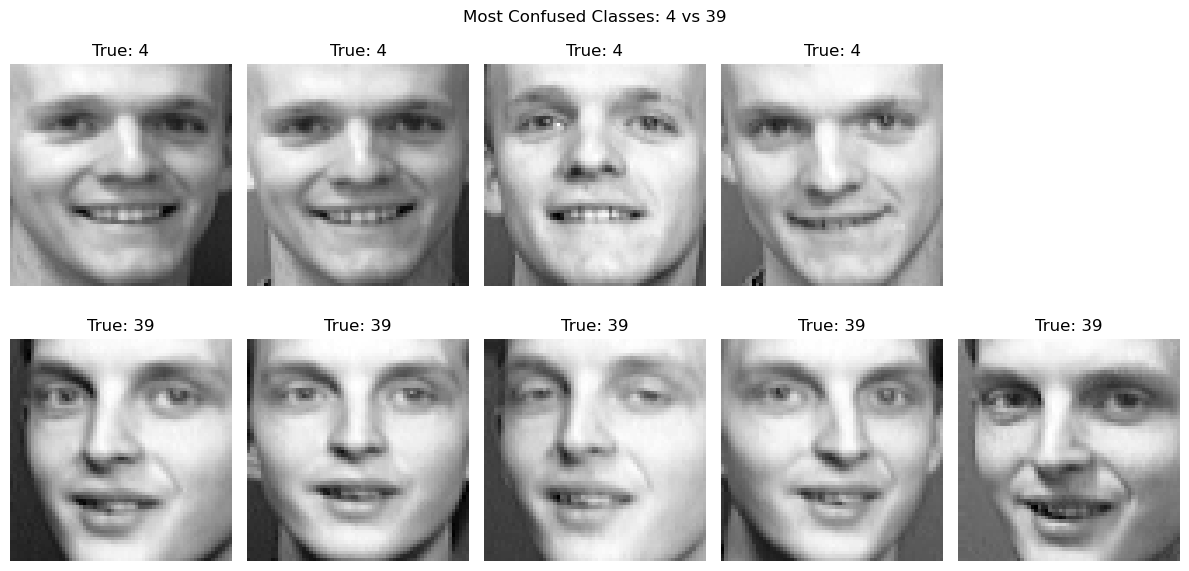

In [12]:
# Visualize for LDA
visualize_highest_confusion(lda_cm, y_pred_lda, X_test, y_test)

Highest confusion between classes 34 and 29


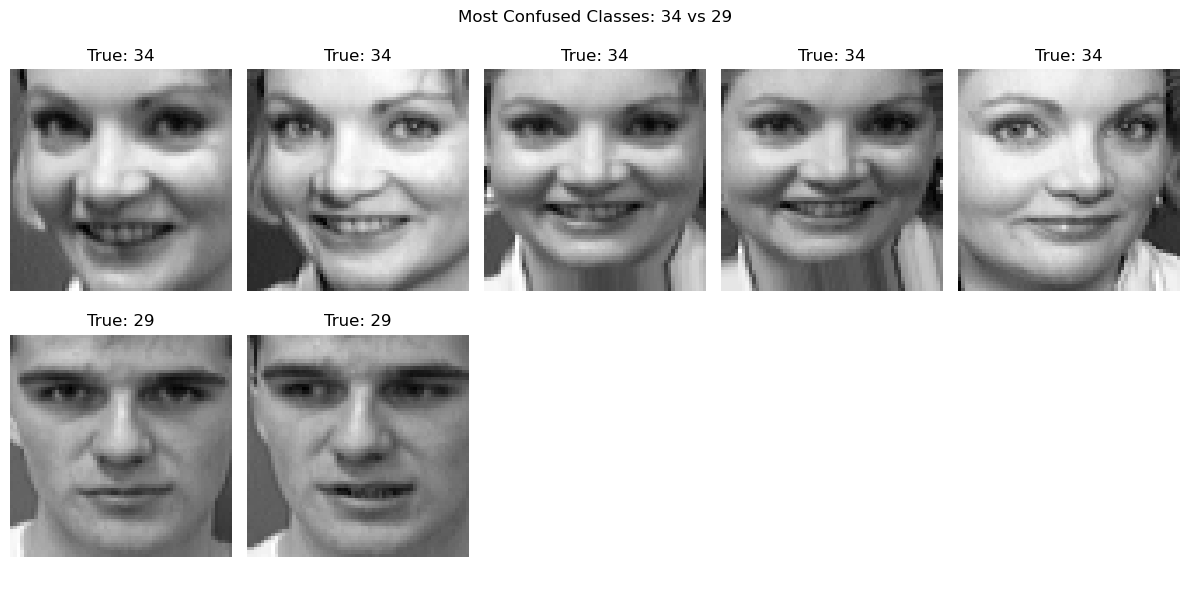

In [13]:
# Visualize for SVM
visualize_highest_confusion(svm_cm, y_pred_svm, X_test, y_test)

In [ ]:
# Report template
"""
## Visualization of the 2D face representation computed by LDA
The visualization of the 2D face representation can be seen above.

## Experimental results

Training description ...

The training for this utilized the Olivertti Faces Dataset. It consists of 40 test subjects, each having 10 images.
The data was split so that the first 5 images were used for training and last 5 images were used for testing.                                                                                               
The use of Linear Discriminant Analysis (LDA) and Support Vector Machine (SVM) models were utlized.
Metric for this would include a classification report with precision, recall and F-1 score and a Confusion Matrix to visualize the performance of the models' performance in distinguishing the different subjects.

Obtained results ...

F-1 Score for LDA had a 94% accuracy while the F-1 score for the SVM is at 89%.
The Confusion Matrix for both LDA and SVM indicate a strong, clean diagonal line with both having only a few outliers. 

Analysis of the results ...
LDA performed better than SVM as a whole. LDA's Confusion Matrix had stronger performances as indicated by more larger numbers along the diagonal meaning more correct predictions.The F-1 score also gave a higher accuracy percentage.

Visualization of the individuals with highest confusion ...

Upon visual inspection of the highest confusion in both LDA and SVM:
LDA: Both subjects are male, faint eyebrows and looks like teeth may have also played into it as a factor. As a side note, I will also say that class 4 does look like how I looked in my 20's without a beard. I personally feel class 39 looks like a young Christopher Walken and ironically, I got called that on one of my ships in the Navy by my peers.
SVM: The subjects are of opposite gender, with 34 being female and 29 being male. Both do have dark eye brows and are wearing a white shirt and both appear to be caucasion. However, it doesn't seem like there's much in common after those traits.
"""
